# Task 1

In [597]:
import pandas as pd
import numpy as np
import string
import warnings
warnings.filterwarnings("ignore")
import ast
import re
!pip install pytorch
!pip install spacy
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import StanfordNERTagger
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-anecj3sg/pytorch_c51ed512efa046ca82e17f766641c7dc/setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


# Loading Dataset

In [598]:
df= pd.read_csv('/kaggle/input/ner-dataset-nlu/NER_Dataset.csv')

In [599]:
df.head()

,Sentence_ID,Word,POS,Tag
0,Sentence: 1,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 10,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
2,Sentence: 100,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '..."
3,Sentence: 1000,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 10000,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-..."


In [600]:
len(df)

47959

In [601]:
df['sentence']=df['Word']

In [602]:
df

,Sentence_ID,Word,POS,Tag,sentence
0,Sentence: 1,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...","['Thousands', 'of', 'demonstrators', 'have', '..."
1,Sentence: 10,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...","['Iranian', 'officials', 'say', 'they', 'expec..."
2,Sentence: 100,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '...","['Helicopter', 'gunships', 'Saturday', 'pounde..."
3,Sentence: 1000,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['They', 'left', 'after', 'a', 'tense', 'hour-..."
4,Sentence: 10000,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-...","['U.N.', 'relief', 'coordinator', 'Jan', 'Egel..."
...,...,...,...,...,...
47954,Sentence: 9995,"['Opposition', 'leader', 'Mir', 'Hossein', 'Mo...","['NNP', 'NN', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN...","['O', 'O', 'O', 'B-per', 'I-per', 'O', 'O', 'O...","['Opposition', 'leader', 'Mir', 'Hossein', 'Mo..."
47955,Sentence: 9996,"['On', 'Thursday', ',', 'Iranian', 'state', 'm...","['IN', 'NNP', ',', 'JJ', 'NN', 'NNS', 'VBN', '...","['O', 'B-tim', 'O', 'B-gpe', 'O', 'O', 'O', 'O...","['On', 'Thursday', ',', 'Iranian', 'state', 'm..."
47956,Sentence: 9997,"['Following', 'Iran', ""'s"", 'disputed', 'June'...","['VBG', 'NNP', 'POS', 'JJ', 'NNP', 'CD', 'NNS'...","['O', 'B-geo', 'O', 'O', 'B-tim', 'I-tim', 'O'...","['Following', 'Iran', ""'s"", 'disputed', 'June'..."
47957,Sentence: 9998,"['Since', 'then', ',', 'authorities', 'have', ...","['IN', 'RB', ',', 'NNS', 'VBP', 'VBN', 'JJ', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['Since', 'then', ',', 'authorities', 'have', ..."


# Data Preprocessing

In [603]:
df = df.drop(columns=['Sentence_ID'])

In [604]:
word_list=df['Word'][0]

In [605]:
word_list

"['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.']"

In [606]:
word_list_string = ast.literal_eval(word_list)
sentence_form = ' '.join(word_list_string)

In [607]:
sentence_form

'Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .'

In [608]:
df

,Word,POS,Tag,sentence
0,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...","['Thousands', 'of', 'demonstrators', 'have', '..."
1,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...","['Iranian', 'officials', 'say', 'they', 'expec..."
2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '...","['Helicopter', 'gunships', 'Saturday', 'pounde..."
3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['They', 'left', 'after', 'a', 'tense', 'hour-..."
4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-...","['U.N.', 'relief', 'coordinator', 'Jan', 'Egel..."
...,...,...,...,...
47954,"['Opposition', 'leader', 'Mir', 'Hossein', 'Mo...","['NNP', 'NN', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN...","['O', 'O', 'O', 'B-per', 'I-per', 'O', 'O', 'O...","['Opposition', 'leader', 'Mir', 'Hossein', 'Mo..."
47955,"['On', 'Thursday', ',', 'Iranian', 'state', 'm...","['IN', 'NNP', ',', 'JJ', 'NN', 'NNS', 'VBN', '...","['O', 'B-tim', 'O', 'B-gpe', 'O', 'O', 'O', 'O...","['On', 'Thursday', ',', 'Iranian', 'state', 'm..."
47956,"['Following', 'Iran', ""'s"", 'disputed', 'June'...","['VBG', 'NNP', 'POS', 'JJ', 'NNP', 'CD', 'NNS'...","['O', 'B-geo', 'O', 'O', 'B-tim', 'I-tim', 'O'...","['Following', 'Iran', ""'s"", 'disputed', 'June'..."
47957,"['Since', 'then', ',', 'authorities', 'have', ...","['IN', 'RB', ',', 'NNS', 'VBP', 'VBN', 'JJ', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['Since', 'then', ',', 'authorities', 'have', ..."


In [609]:
for i in range(len(df)):
    word_list = df['sentence'][i]
    word_list_string = ast.literal_eval(word_list)
    sentence = ' '.join(word_list_string)
    df.at[i, 'sentence'] = sentence

In [610]:
df

,Word,POS,Tag,sentence
0,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...",Thousands of demonstrators have marched throug...
1,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...",Iranian officials say they expect to get acces...
2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '...",Helicopter gunships Saturday pounded militant ...
3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...",They left after a tense hour-long standoff wit...
4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-...",U.N. relief coordinator Jan Egeland said Sunda...
...,...,...,...,...
47954,"['Opposition', 'leader', 'Mir', 'Hossein', 'Mo...","['NNP', 'NN', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN...","['O', 'O', 'O', 'B-per', 'I-per', 'O', 'O', 'O...",Opposition leader Mir Hossein Mousavi has said...
47955,"['On', 'Thursday', ',', 'Iranian', 'state', 'm...","['IN', 'NNP', ',', 'JJ', 'NN', 'NNS', 'VBN', '...","['O', 'B-tim', 'O', 'B-gpe', 'O', 'O', 'O', 'O...","On Thursday , Iranian state media published a ..."
47956,"['Following', 'Iran', ""'s"", 'disputed', 'June'...","['VBG', 'NNP', 'POS', 'JJ', 'NNP', 'CD', 'NNS'...","['O', 'B-geo', 'O', 'O', 'B-tim', 'I-tim', 'O'...","Following Iran 's disputed June 12 elections ,..."
47957,"['Since', 'then', ',', 'authorities', 'have', ...","['IN', 'RB', ',', 'NNS', 'VBP', 'VBN', 'JJ', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","Since then , authorities have held public tria..."


In [611]:
spacy_tag_mapping = {
    "B-art": "ART",
    "B-eve": "EVENT",
    "B-geo": "GPE",
    "B-gpe": "GPE",
    "B-nat": "NORP",
    "B-org": "ORG",
    "B-per": "PERSON",
    "B-tim": "TIME",
    "I-art": "ART",
    "I-eve": "EVENT",
    "I-geo": "GPE",
    "I-gpe": "GPE",
    "I-nat": "NORP",
    "I-org": "ORG",
    "I-per": "PERSON",
    "I-tim": "TIME",
    "O": ""
}

In [612]:
nltk_tag_mapping = {
    "B-art": "ART",
    "B-eve": "EVENT",
    "B-geo": "GPE",
    "B-gpe": "GPE",
    "B-nat": "NORP",
    "B-org": "ORG",
    "B-per": "PERSON",
    "B-tim": "TIME",
    "I-art": "ART",
    "I-eve": "EVENT",
    "I-geo": "GPE",
    "I-gpe": "GPE",
    "I-nat": "NORP",
    "I-org": "ORG",
    "I-per": "PERSON",
    "I-tim": "TIME",
    "O": ""
}


In [613]:
stanford_ner_tag_mapping = {
    "B-art": "ART",
    "B-eve": "EVENT",
    "B-geo": "LOCATION",
    "B-gpe": "LOCATION",
    "B-nat": "LOCATION",
    "B-org": "ORGANIZATION",
    "B-per": "PERSON",
    "B-tim": "DATE",
    "I-art": "ART",
    "I-eve": "EVENT",
    "I-geo": "LOCATION",
    "I-gpe": "LOCATION",
    "I-nat": "LOCATION",
    "I-org": "ORGANIZATION",
    "I-per": "PERSON",
    "I-tim": "DATE",
    "O": ""
}


In [614]:
df['spacy_tag']=df['Tag']
df['nltk_tag']=df['Tag']
df['stanford_ner']=df['Tag']

In [615]:
for i in range(len(df)):
    word_list = df['Tag'][i]
    df['Tag'][i] = ast.literal_eval(word_list)

In [616]:
df

,Word,POS,Tag,sentence,spacy_tag,nltk_tag,stanford_ner
0,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...",Thousands of demonstrators have marched throug...,"['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...",Iranian officials say they expect to get acces...,"['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...",Helicopter gunships Saturday pounded militant ...,"['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '...","['O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'O', '..."
3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","[O, O, O, O, O, O, O, O, O, O, O]",They left after a tense hour-long standoff wit...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...",U.N. relief coordinator Jan Egeland said Sunda...,"['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-...","['B-geo', 'O', 'O', 'B-per', 'I-per', 'O', 'B-..."
...,...,...,...,...,...,...,...
47954,"['Opposition', 'leader', 'Mir', 'Hossein', 'Mo...","['NNP', 'NN', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O...",Opposition leader Mir Hossein Mousavi has said...,"['O', 'O', 'O', 'B-per', 'I-per', 'O', 'O', 'O...","['O', 'O', 'O', 'B-per', 'I-per', 'O', 'O', 'O...","['O', 'O', 'O', 'B-per', 'I-per', 'O', 'O', 'O..."
47955,"['On', 'Thursday', ',', 'Iranian', 'state', 'm...","['IN', 'NNP', ',', 'JJ', 'NN', 'NNS', 'VBN', '...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...","On Thursday , Iranian state media published a ...","['O', 'B-tim', 'O', 'B-gpe', 'O', 'O', 'O', 'O...","['O', 'B-tim', 'O', 'B-gpe', 'O', 'O', 'O', 'O...","['O', 'B-tim', 'O', 'B-gpe', 'O', 'O', 'O', 'O..."
47956,"['Following', 'Iran', ""'s"", 'disputed', 'June'...","['VBG', 'NNP', 'POS', 'JJ', 'NNP', 'CD', 'NNS'...","[O, B-geo, O, O, B-tim, I-tim, O, O, O, O, O, ...","Following Iran 's disputed June 12 elections ,...","['O', 'B-geo', 'O', 'O', 'B-tim', 'I-tim', 'O'...","['O', 'B-geo', 'O', 'O', 'B-tim', 'I-tim', 'O'...","['O', 'B-geo', 'O', 'O', 'B-tim', 'I-tim', 'O'..."
47957,"['Since', 'then', ',', 'authorities', 'have', ...","['IN', 'RB', ',', 'NNS', 'VBP', 'VBN', 'JJ', '...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","Since then , authorities have held public tria...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [617]:
def map_tags(word_list, dictionary_map):
    transformed_list = []
    for word in word_list:
        if word in dictionary_map:
            transformed_list.append(dictionary_map[word])
        else:
            transformed_list.append(word)
    return transformed_list

In [618]:
for i in range(len(df['spacy_tag'])):
    word_list_string = ast.literal_eval(df['spacy_tag'][i])
    df['spacy_tag'][i]=map_tags(word_list_string, spacy_tag_mapping)

for i in range(len(df['nltk_tag'])):
    word_list_string = ast.literal_eval(df['nltk_tag'][i])
    df['nltk_tag'][i]=map_tags(word_list_string, spacy_tag_mapping)
    
for i in range(len(df['spacy_tag'])):
    word_list_string = ast.literal_eval(df['stanford_ner'][i])
    df['stanford_ner'][i]=map_tags(word_list_string, spacy_tag_mapping)

In [619]:
df

,Word,POS,Tag,sentence,spacy_tag,nltk_tag,stanford_ner
0,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...",Thousands of demonstrators have marched throug...,"[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE..."
1,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...",Iranian officials say they expect to get acces...,"[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ..."
2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...",Helicopter gunships Saturday pounded militant ...,"[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,..."
3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","[O, O, O, O, O, O, O, O, O, O, O]",They left after a tense hour-long standoff wit...,"[, , , , , , , , , , ]","[, , , , , , , , , , ]","[, , , , , , , , , , ]"
4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...",U.N. relief coordinator Jan Egeland said Sunda...,"[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE..."
...,...,...,...,...,...,...,...
47954,"['Opposition', 'leader', 'Mir', 'Hossein', 'Mo...","['NNP', 'NN', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O...",Opposition leader Mir Hossein Mousavi has said...,"[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,..."
47955,"['On', 'Thursday', ',', 'Iranian', 'state', 'm...","['IN', 'NNP', ',', 'JJ', 'NN', 'NNS', 'VBN', '...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...","On Thursday , Iranian state media published a ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ..."
47956,"['Following', 'Iran', ""'s"", 'disputed', 'June'...","['VBG', 'NNP', 'POS', 'JJ', 'NNP', 'CD', 'NNS'...","[O, B-geo, O, O, B-tim, I-tim, O, O, O, O, O, ...","Following Iran 's disputed June 12 elections ,...","[, GPE, , , TIME, TIME, , , , , , , , , , , , ...","[, GPE, , , TIME, TIME, , , , , , , , , , , , ...","[, GPE, , , TIME, TIME, , , , , , , , , , , , ..."
47957,"['Since', 'then', ',', 'authorities', 'have', ...","['IN', 'RB', ',', 'NNS', 'VBP', 'VBN', 'JJ', '...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","Since then , authorities have held public tria...","[, , , , , , , , , , , , , , , , , , , , ]","[, , , , , , , , , , , , , , , , , , , , ]","[, , , , , , , , , , , , , , , , , , , , ]"


In [620]:
# for i in range(l):
#     review= re.sub('[^a-zA-Z]', ' ', df['sentence'][i])
#     review=review.lower()
#     df['sentence'][i]=review

In [621]:
df['sentence'][0]

'Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .'

# Part 1

# a)

In [622]:
nlp = spacy.load("en_core_web_sm")

In [623]:
df['pos_spacy']=df['sentence']
df['ner_spacy']=df['sentence']

In [624]:
for i in range(len(df)):
    doc = nlp(df['sentence'][i])
    df['pos_spacy'][i] = [(token.text, token.tag_) for token in doc]
    df['ner_spacy'][i] = [(ent.text, ent.label_) for ent in doc.ents]

In [625]:
df

,Word,POS,Tag,sentence,spacy_tag,nltk_tag,stanford_ner,pos_spacy,ner_spacy
0,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...",Thousands of demonstrators have marched throug...,"[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[(Thousands, NNS), (of, IN), (demonstrators, N...","[(Thousands, CARDINAL), (London, GPE), (Iraq, ..."
1,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...",Iranian officials say they expect to get acces...,"[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[(Iranian, JJ), (officials, NNS), (say, VBP), ...","[(Iranian, NORP), (Wednesday, DATE), (IAEA, ORG)]"
2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...",Helicopter gunships Saturday pounded militant ...,"[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[(Helicopter, NN), (gunships, NNS), (Saturday,...","[(Saturday, DATE), (Orakzai, PERSON), (Taliban..."
3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","[O, O, O, O, O, O, O, O, O, O, O]",They left after a tense hour-long standoff wit...,"[, , , , , , , , , , ]","[, , , , , , , , , , ]","[, , , , , , , , , , ]","[(They, PRP), (left, VBD), (after, IN), (a, DT...","[(a tense hour, TIME)]"
4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...",U.N. relief coordinator Jan Egeland said Sunda...,"[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[(U.N., NNP), (relief, NN), (coordinator, NN),...","[(U.N., ORG), (Jan Egeland, PERSON), (Sunday, ..."
...,...,...,...,...,...,...,...,...,...
47954,"['Opposition', 'leader', 'Mir', 'Hossein', 'Mo...","['NNP', 'NN', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O...",Opposition leader Mir Hossein Mousavi has said...,"[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[(Opposition, NN), (leader, NN), (Mir, NNP), (...","[(Mir Hossein Mousavi, PERSON), (Mahmoud Ahmad..."
47955,"['On', 'Thursday', ',', 'Iranian', 'state', 'm...","['IN', 'NNP', ',', 'JJ', 'NN', 'NNS', 'VBN', '...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...","On Thursday , Iranian state media published a ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[(On, IN), (Thursday, NNP), (,, ,), (Iranian, ...","[(Thursday, DATE), (Iranian, NORP), (Revolutio..."
47956,"['Following', 'Iran', ""'s"", 'disputed', 'June'...","['VBG', 'NNP', 'POS', 'JJ', 'NNP', 'CD', 'NNS'...","[O, B-geo, O, O, B-tim, I-tim, O, O, O, O, O, ...","Following Iran 's disputed June 12 elections ,...","[, GPE, , , TIME, TIME, , , , , , , , , , , , ...","[, GPE, , , TIME, TIME, , , , , , , , , , , , ...","[, GPE, , , TIME, TIME, , , , , , , , , , , , ...","[(Following, VBG), (Iran, NNP), ('s, POS), (di...","[(Iran, GPE), (June 12, DATE), (hundreds, CARD..."
47957,"['Since', 'then', ',', 'authorities', 'have', ...","['IN', 'RB', ',', 'NNS', 'VBP', 'VBN', 'JJ', '...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","Since then , authorities have held public tria...","[, , , , , , , , , , , , , , , ,

## b)

In [626]:
def pos_tag_nltk(sentence):
    tokens = word_tokenize(sentence)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

In [627]:
def ner_nltk_func(sentence):
    tokens = word_tokenize(sentence)
    ner_tags = nltk.ne_chunk(nltk.pos_tag(tokens))
    return ner_tags

In [628]:
df['pos_nltk']=df['sentence']
df['ner_nltk']=df['sentence']

In [629]:
for i in range(len(df)):
    df['pos_nltk'][i] = pos_tag_nltk(df['sentence'][i])
    df['ner_nltk'][i] = ner_nltk_func(df['sentence'][i])

In [630]:
df['POS'][0]

"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP', 'TO', 'VB', 'DT', 'NN', 'IN', 'NNP', 'CC', 'VB', 'DT', 'NN', 'IN', 'JJ', 'NNS', 'IN', 'DT', 'NN', '.']"

In [631]:
df['pos_nltk'][0]

[('Thousands', 'NNS'),
 ('of', 'IN'),
 ('demonstrators', 'NNS'),
 ('have', 'VBP'),
 ('marched', 'VBN'),
 ('through', 'IN'),
 ('London', 'NNP'),
 ('to', 'TO'),
 ('protest', 'VB'),
 ('the', 'DT'),
 ('war', 'NN'),
 ('in', 'IN'),
 ('Iraq', 'NNP'),
 ('and', 'CC'),
 ('demand', 'VB'),
 ('the', 'DT'),
 ('withdrawal', 'NN'),
 ('of', 'IN'),
 ('British', 'JJ'),
 ('troops', 'NNS'),
 ('from', 'IN'),
 ('that', 'DT'),
 ('country', 'NN'),
 ('.', '.')]

In [632]:
print(df['ner_nltk'][0])

(S
  Thousands/NNS
  of/IN
  demonstrators/NNS
  have/VBP
  marched/VBN
  through/IN
  (GPE London/NNP)
  to/TO
  protest/VB
  the/DT
  war/NN
  in/IN
  (GPE Iraq/NNP)
  and/CC
  demand/VB
  the/DT
  withdrawal/NN
  of/IN
  (GPE British/JJ)
  troops/NNS
  from/IN
  that/DT
  country/NN
  ./.)


In [633]:
df

,Word,POS,Tag,sentence,spacy_tag,nltk_tag,stanford_ner,pos_spacy,ner_spacy,pos_nltk,ner_nltk
0,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...",Thousands of demonstrators have marched throug...,"[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[(Thousands, NNS), (of, IN), (demonstrators, N...","[(Thousands, CARDINAL), (London, GPE), (Iraq, ...","[(Thousands, NNS), (of, IN), (demonstrators, N...","[(Thousands, NNS), (of, IN), (demonstrators, N..."
1,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...",Iranian officials say they expect to get acces...,"[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[(Iranian, JJ), (officials, NNS), (say, VBP), ...","[(Iranian, NORP), (Wednesday, DATE), (IAEA, ORG)]","[(Iranian, JJ), (officials, NNS), (say, VBP), ...","[[(Iranian, JJ)], (officials, NNS), (say, VBP)..."
2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...",Helicopter gunships Saturday pounded militant ...,"[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[(Helicopter, NN), (gunships, NNS), (Saturday,...","[(Saturday, DATE), (Orakzai, PERSON), (Taliban...","[(Helicopter, NNP), (gunships, NNS), (Saturday...","[(Helicopter, NNP), (gunships, NNS), (Saturday..."
3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","[O, O, O, O, O, O, O, O, O, O, O]",They left after a tense hour-long standoff wit...,"[, , , , , , , , , , ]","[, , , , , , , , , , ]","[, , , , , , , , , , ]","[(They, PRP), (left, VBD), (after, IN), (a, DT...","[(a tense hour, TIME)]","[(They, PRP), (left, VBD), (after, IN), (a, DT...","[(They, PRP), (left, VBD), (after, IN), (a, DT..."
4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...",U.N. relief coordinator Jan Egeland said Sunda...,"[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[(U.N., NNP), (relief, NN), (coordinator, NN),...","[(U.N., ORG), (Jan Egeland, PERSON), (Sunday, ...","[(U.N., NNP), (relief, NN), (coordinator, NN),...","[[(U.N., NNP)], (relief, NN), (coordinator, NN..."
...,...,...,...,...,...,...,...,...,...,...,...
47954,"['Opposition', 'leader', 'Mir', 'Hossein', 'Mo...","['NNP', 'NN', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O...",Opposition leader Mir Hossein Mousavi has said...,"[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[(Opposition, NN), (leader, NN), (Mir, NNP), (...","[(Mir Hossein Mousavi, PERSON), (Mahmoud Ahmad...","[(Opposition, NN), (leader, NN), (Mir, NNP), (...","[[(Opposition, NN)], (leader, NN), [(Mir, NNP)..."
47955,"['On', 'Thursday', ',', 'Iranian', 'state', 'm...","['IN', 'NNP', ',', 'JJ', 'NN', 'NNS', 'VBN', '...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...","On Thursday , Iranian state media published a ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[(On, IN), (Thursday, NNP), (,, ,), (Iranian, ...","[(Thursday, DATE), (Iranian, NORP), (Revolutio...","[(On, IN), (Thursday, NNP), (,, ,), (Iranian, ...","[(On, IN), (Thursday

## c)

In [ ]:
stanford_ner_model = 'path_to_stanford_ner_model'
stanford_ner_jar = 'path_to_stanford_ner_jar'
st = StanfordNERTagger(stanford_ner_model, stanford_ner_jar, encoding='utf-8')

In [637]:
def pos_tag_stanford_ner(sentence):
    tokens = word_tokenize(sentence)
    pos_tags = st.tag(tokens)
    return pos_tags

In [ ]:
def ner_stanford_ner(sentence):
    tokens = word_tokenize(sentence)
    ner_tags = st.tag(tokens)
    return ner_tags

In [ ]:
df['pos_stanford']=df['sentence']
df['ner_stanford']=df['sentence']

In [ ]:
for i in range(len(df)):
    df['pos_stanford'][i] = pos_tag_stanford_ner(df['sentence'][i])
    df['ner_stanford'][i] = ner_stanford_ner(df['sentence'][i])

# Part 3

## NLTK

In [ ]:
for i in range(len(df)):
    word_list = df['pos_nltk'][i]
    df['pos_nltk'][i] = ast.literal_eval(word_list)

In [638]:
df

,Word,POS,Tag,sentence,spacy_tag,nltk_tag,stanford_ner,pos_spacy,ner_spacy,pos_nltk,ner_nltk
0,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...",Thousands of demonstrators have marched throug...,"[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[(Thousands, NNS), (of, IN), (demonstrators, N...","[(Thousands, CARDINAL), (London, GPE), (Iraq, ...","[(Thousands, NNS), (of, IN), (demonstrators, N...","[(Thousands, NNS), (of, IN), (demonstrators, N..."
1,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...",Iranian officials say they expect to get acces...,"[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[(Iranian, JJ), (officials, NNS), (say, VBP), ...","[(Iranian, NORP), (Wednesday, DATE), (IAEA, ORG)]","[(Iranian, JJ), (officials, NNS), (say, VBP), ...","[[(Iranian, JJ)], (officials, NNS), (say, VBP)..."
2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...",Helicopter gunships Saturday pounded militant ...,"[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[(Helicopter, NN), (gunships, NNS), (Saturday,...","[(Saturday, DATE), (Orakzai, PERSON), (Taliban...","[(Helicopter, NNP), (gunships, NNS), (Saturday...","[(Helicopter, NNP), (gunships, NNS), (Saturday..."
3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","[O, O, O, O, O, O, O, O, O, O, O]",They left after a tense hour-long standoff wit...,"[, , , , , , , , , , ]","[, , , , , , , , , , ]","[, , , , , , , , , , ]","[(They, PRP), (left, VBD), (after, IN), (a, DT...","[(a tense hour, TIME)]","[(They, PRP), (left, VBD), (after, IN), (a, DT...","[(They, PRP), (left, VBD), (after, IN), (a, DT..."
4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...",U.N. relief coordinator Jan Egeland said Sunda...,"[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[(U.N., NNP), (relief, NN), (coordinator, NN),...","[(U.N., ORG), (Jan Egeland, PERSON), (Sunday, ...","[(U.N., NNP), (relief, NN), (coordinator, NN),...","[[(U.N., NNP)], (relief, NN), (coordinator, NN..."
...,...,...,...,...,...,...,...,...,...,...,...
47954,"['Opposition', 'leader', 'Mir', 'Hossein', 'Mo...","['NNP', 'NN', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O...",Opposition leader Mir Hossein Mousavi has said...,"[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[(Opposition, NN), (leader, NN), (Mir, NNP), (...","[(Mir Hossein Mousavi, PERSON), (Mahmoud Ahmad...","[(Opposition, NN), (leader, NN), (Mir, NNP), (...","[[(Opposition, NN)], (leader, NN), [(Mir, NNP)..."
47955,"['On', 'Thursday', ',', 'Iranian', 'state', 'm...","['IN', 'NNP', ',', 'JJ', 'NN', 'NNS', 'VBN', '...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...","On Thursday , Iranian state media published a ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[(On, IN), (Thursday, NNP), (,, ,), (Iranian, ...","[(Thursday, DATE), (Iranian, NORP), (Revolutio...","[(On, IN), (Thursday, NNP), (,, ,), (Iranian, ...","[(On, IN), (Thursday

In [ ]:
for i in range(len(df)):
    list=[]
    for j in range(len(df['pos_nltk'][i])):
        list.append(df['pos_nltk'][i][j][1])
    df['pos_nltk'][i]=list

In [ ]:
for i in range(len(df)):
    list=[]
    for j in range(len(df['pos_spacy'][i])):
        list.append(df['pos_spacy'][i][j][1])
    df['pos_spacy'][i]=list

In [644]:
df

,Word,POS,Tag,sentence,spacy_tag,nltk_tag,stanford_ner,pos_spacy,ner_spacy,pos_nltk,ner_nltk
0,"['Thousands', 'of', 'demonstrators', 'have', '...","['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...",Thousands of demonstrators have marched throug...,"[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[(Thousands, CARDINAL), (London, GPE), (Iraq, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[(Thousands, NNS), (of, IN), (demonstrators, N..."
1,"['Iranian', 'officials', 'say', 'they', 'expec...","['JJ', 'NNS', 'VBP', 'PRP', 'VBP', 'TO', 'VB',...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...",Iranian officials say they expect to get acces...,"[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, IN, VBN, ...","[(Iranian, NORP), (Wednesday, DATE), (IAEA, ORG)]","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, VB, J...","[[(Iranian, JJ)], (officials, NNS), (say, VBP)..."
2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","['NN', 'NNS', 'NNP', 'VBD', 'JJ', 'NNS', 'IN',...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...",Helicopter gunships Saturday pounded militant ...,"[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[(Saturday, DATE), (Orakzai, PERSON), (Taliban...","[NNP, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ,...","[(Helicopter, NNP), (gunships, NNS), (Saturday..."
3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","['PRP', 'VBD', 'IN', 'DT', 'NN', 'JJ', 'NN', '...","[O, O, O, O, O, O, O, O, O, O, O]",They left after a tense hour-long standoff wit...,"[, , , , , , , , , , ]","[, , , , , , , , , , ]","[, , , , , , , , , , ]","[PRP, VBD, IN, DT, JJ, NN, HYPH, JJ, NN, IN, N...","[(a tense hour, TIME)]","[PRP, VBD, IN, DT, JJ, JJ, NN, IN, JJ, NNS, .]","[(They, PRP), (left, VBD), (after, IN), (a, DT..."
4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","['NNP', 'NN', 'NN', 'NNP', 'NNP', 'VBD', 'NNP'...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...",U.N. relief coordinator Jan Egeland said Sunda...,"[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[(U.N., ORG), (Jan Egeland, PERSON), (Sunday, ...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, N...","[[(U.N., NNP)], (relief, NN), (coordinator, NN..."
...,...,...,...,...,...,...,...,...,...,...,...
47954,"['Opposition', 'leader', 'Mir', 'Hossein', 'Mo...","['NNP', 'NN', 'NNP', 'NNP', 'NNP', 'VBZ', 'VBN...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O...",Opposition leader Mir Hossein Mousavi has said...,"[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[NN, NN, NNP, NNP, NNP, VBZ, VBN, PRP, VBZ, TO...","[(Mir Hossein Mousavi, PERSON), (Mahmoud Ahmad...","[NN, NN, NNP, NNP, NNP, VBZ, VBD, PRP, VBZ, TO...","[[(Opposition, NN)], (leader, NN), [(Mir, NNP)..."
47955,"['On', 'Thursday', ',', 'Iranian', 'state', 'm...","['IN', 'NNP', ',', 'JJ', 'NN', 'NNS', 'VBN', '...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...","On Thursday , Iranian state media published a ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[IN, NNP, ,, JJ, NN, NNS, VBD, DT, NN, IN, DT,...","[(Thursday, DATE), (Iranian, NORP), (Revolutio...","[IN, NNP, ,, JJ, NN, NNS, VBD, DT, NN, IN, DT,...","[(On, IN), (Thursday, N

In [ ]:
# for i in range(len(df)):
#     word_list = df['ner_nltk'][i]
#     df['ner_nltk'][i] = ast.literal_eval(word_list)

In [643]:
type(df['POS'][0])

str

In [645]:
for i in range(len(df)):
    word_list = df['POS'][i]
    df['POS'][i] = ast.literal_eval(word_list)

In [646]:
df

,Word,POS,Tag,sentence,spacy_tag,nltk_tag,stanford_ner,pos_spacy,ner_spacy,pos_nltk,ner_nltk
0,"['Thousands', 'of', 'demonstrators', 'have', '...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...",Thousands of demonstrators have marched throug...,"[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[, , , , , , GPE, , , , , , GPE, , , , , , GPE...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[(Thousands, CARDINAL), (London, GPE), (Iraq, ...","[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[(Thousands, NNS), (of, IN), (demonstrators, N..."
1,"['Iranian', 'officials', 'say', 'they', 'expec...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...",Iranian officials say they expect to get acces...,"[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[GPE, , , , , , , , , , , , , , , TIME, , , , ...","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, IN, VBN, ...","[(Iranian, NORP), (Wednesday, DATE), (IAEA, ORG)]","[JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, VB, J...","[[(Iranian, JJ)], (officials, NNS), (say, VBP)..."
2,"['Helicopter', 'gunships', 'Saturday', 'pounde...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...",Helicopter gunships Saturday pounded militant ...,"[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[, , TIME, , , , , , GPE, , , , , , ORG, , , ,...","[NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...","[(Saturday, DATE), (Orakzai, PERSON), (Taliban...","[NNP, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ,...","[(Helicopter, NNP), (gunships, NNS), (Saturday..."
3,"['They', 'left', 'after', 'a', 'tense', 'hour-...","[PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]","[O, O, O, O, O, O, O, O, O, O, O]",They left after a tense hour-long standoff wit...,"[, , , , , , , , , , ]","[, , , , , , , , , , ]","[, , , , , , , , , , ]","[PRP, VBD, IN, DT, JJ, NN, HYPH, JJ, NN, IN, N...","[(a tense hour, TIME)]","[PRP, VBD, IN, DT, JJ, JJ, NN, IN, JJ, NNS, .]","[(They, PRP), (left, VBD), (after, IN), (a, DT..."
4,"['U.N.', 'relief', 'coordinator', 'Jan', 'Egel...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[B-geo, O, O, B-per, I-per, O, B-tim, O, B-geo...",U.N. relief coordinator Jan Egeland said Sunda...,"[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[GPE, , , PERSON, PERSON, , TIME, , GPE, , GPE...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...","[(U.N., ORG), (Jan Egeland, PERSON), (Sunday, ...","[NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, N...","[[(U.N., NNP)], (relief, NN), (coordinator, NN..."
...,...,...,...,...,...,...,...,...,...,...,...
47954,"['Opposition', 'leader', 'Mir', 'Hossein', 'Mo...","[NNP, NN, NNP, NNP, NNP, VBZ, VBN, PRP, VBZ, T...","[O, O, O, B-per, I-per, O, O, O, O, O, O, O, O...",Opposition leader Mir Hossein Mousavi has said...,"[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[, , , PERSON, PERSON, , , , , , , , , , , , ,...","[NN, NN, NNP, NNP, NNP, VBZ, VBN, PRP, VBZ, TO...","[(Mir Hossein Mousavi, PERSON), (Mahmoud Ahmad...","[NN, NN, NNP, NNP, NNP, VBZ, VBD, PRP, VBZ, TO...","[[(Opposition, NN)], (leader, NN), [(Mir, NNP)..."
47955,"['On', 'Thursday', ',', 'Iranian', 'state', 'm...","[IN, NNP, ,, JJ, NN, NNS, VBN, DT, NN, IN, DT,...","[O, B-tim, O, B-gpe, O, O, O, O, O, O, O, O, B...","On Thursday , Iranian state media published a ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[, TIME, , GPE, , , , , , , , , ORG, ORG, , , ...","[IN, NNP, ,, JJ, NN, NNS, VBD, DT, NN, IN, DT,...","[(Thursday, DATE), (Iranian, NORP), (Revolutio...","[IN, NNP, ,, JJ, NN, NNS, VBD, DT, NN, IN, DT,...","[(On, IN), (Thursday, NNP)

In [647]:
df['POS']

0        [NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...
1        [JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, JJ, J...
2        [NN, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ, ...
3           [PRP, VBD, IN, DT, NN, JJ, NN, IN, NN, NNS, .]
4        [NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, J...
                               ...                        
47954    [NNP, NN, NNP, NNP, NNP, VBZ, VBN, PRP, VBZ, T...
47955    [IN, NNP, ,, JJ, NN, NNS, VBN, DT, NN, IN, DT,...
47956    [VBG, NNP, POS, JJ, NNP, CD, NNS, ,, NNS, NNS,...
47957    [IN, RB, ,, NNS, VBP, VBN, JJ, NNS, IN, DT, VB...
47958    [DT, NNP, NNP, VBZ, VBG, DT, NN, IN, JJ, NNS, ...
Name: POS, Length: 47959, dtype: object

In [648]:
df['pos_nltk']

0        [NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...
1        [JJ, NNS, VBP, PRP, VBP, TO, VB, NN, TO, VB, J...
2        [NNP, NNS, NNP, VBD, JJ, NNS, IN, DT, NNP, JJ,...
3           [PRP, VBD, IN, DT, JJ, JJ, NN, IN, JJ, NNS, .]
4        [NNP, NN, NN, NNP, NNP, VBD, NNP, ,, NNP, ,, N...
                               ...                        
47954    [NN, NN, NNP, NNP, NNP, VBZ, VBD, PRP, VBZ, TO...
47955    [IN, NNP, ,, JJ, NN, NNS, VBD, DT, NN, IN, DT,...
47956    [VBG, NNP, POS, VBN, NNP, CD, NNS, ,, NNS, NNS...
47957    [IN, RB, ,, NNS, VBP, VBN, JJ, NNS, IN, DT, VB...
47958    [DT, NNP, NNPS, VBZ, VBG, DT, NN, IN, JJ, NNS,...
Name: pos_nltk, Length: 47959, dtype: object

In [661]:
# Filter out rows with unequal lengths of POS lists
filtered_df = df[df['POS'].apply(len) == df['pos_nltk'].apply(len)]

# Extract ground truth and predicted data
nltk_ground_truth = filtered_df['POS'].values
nltk_predicted_data = filtered_df['pos_nltk'].values

# Flatten the nested lists
nltk_ground_truth_flat = [item for sublist in nltk_ground_truth for item in sublist]
nltk_predicted_data_flat = [item for sublist in nltk_predicted_data for item in sublist]

# Compute accuracy
nltk_accuracy = accuracy_score(nltk_ground_truth_flat, nltk_predicted_data_flat)


In [662]:
nltk_accuracy

0.9624904845634212

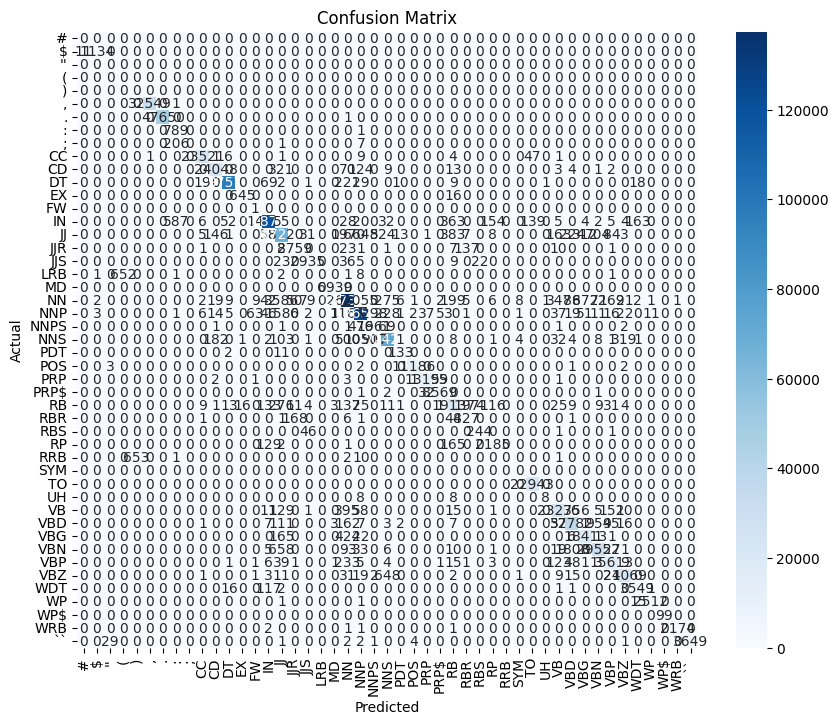

In [663]:
nltk_unique_tags = np.unique(nltk_ground_truth_flat + nltk_predicted_data_flat)
nltk_tags_list = nltk_unique_tags.tolist()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='', cmap='Blues', xticklabels=nltk_tags_list, yticklabels=nltk_tags_list)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## SpaCy

In [664]:
# Filter out rows with unequal lengths of POS lists
spacy_filtered_df = df[df['POS'].apply(len) == df['pos_spacy'].apply(len)]

# Extract ground truth and predicted data
spacy_ground_truth = spacy_filtered_df['POS'].values
spacy_predicted_data = spacy_filtered_df['pos_spacy'].values

# Flatten the nested lists
spacy_ground_truth_flat = [item for sublist in spacy_ground_truth for item in sublist]
spacy_predicted_data_flat = [item for sublist in spacy_predicted_data for item in sublist]

# Compute accuracy
spacy_accuracy = accuracy_score(spacy_ground_truth_flat, spacy_predicted_data_flat)


In [665]:
spacy_accuracy

0.9580469144316944

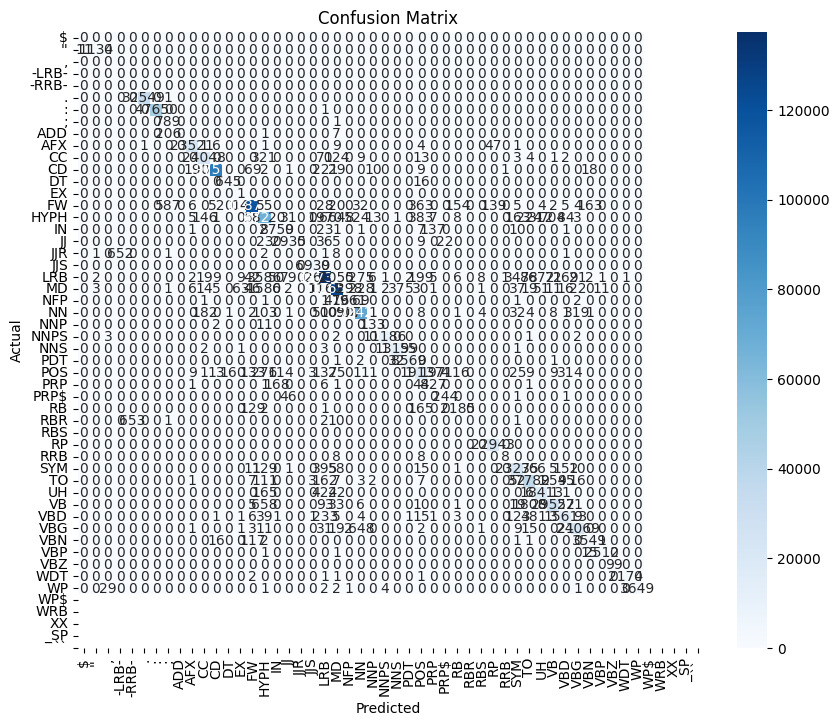

In [667]:
spacy_unique_tags = np.unique(spacy_ground_truth_flat + spacy_predicted_data_flat)
spacy_tags_list = spacy_unique_tags.tolist()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='', cmap='Blues', xticklabels=spacy_tags_list, yticklabels=spacy_tags_list)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

* The NLTK tagger achieves slightly higher accuracy than spaCy on this dataset - 96.25% vs 95.80%. This indicates NLTK may be doing a better job overall at predicting the correct POS tags.

* However, looking at the confusion matrices, NLTK seems to struggle more with certain tag pairs like NN/NNS (noun singular/plural) and VBP/VBZ (verb present tense singular/plural) based on the higher values off the diagonal.

# Part 4

* The NLTK tagger achieves slightly higher accuracy than spaCy on this dataset - 96.25% vs 95.80%. This indicates NLTK may be doing a better job overall at predicting the correct POS tags.

* However, looking at the confusion matrices, NLTK seems to struggle more with certain tag pairs like NN/NNS (noun singular/plural) and VBP/VBZ (verb present tense singular/plural) based on the higher values off the diagonal.

### More evaluation metrices

In [668]:
nltk_precision = precision_score(nltk_ground_truth_flat, nltk_predicted_data_flat, average='weighted')
nltk_recall = recall_score(nltk_ground_truth_flat, nltk_predicted_data_flat, average='weighted')
nltk_f1_score = f1_score(nltk_ground_truth_flat, nltk_predicted_data_flat, average='weighted')


In [669]:
spacy_precision = precision_score(spacy_ground_truth_flat, spacy_predicted_data_flat, average='weighted')
spacy_recall = recall_score(spacy_ground_truth_flat, spacy_predicted_data_flat, average='weighted')
spacy_f1_score = f1_score(spacy_ground_truth_flat, spacy_predicted_data_flat, average='weighted')


In [671]:
print(nltk_precision)
print(nltk_recall)
print(nltk_f1_score)

0.9631666711629274
0.9624904845634212
0.9625794797220429


In [673]:
print(spacy_precision)
print(spacy_recall)
print(spacy_f1_score)

0.9626875131892041
0.9580469144316944
0.9588959908253848


Based on the evaluation metrics obtained:

**NLTK Model:**
- Precision: 96.32%
- Recall: 96.25%
- F1-score: 96.26%

**SpaCy Model:**
- Precision: 96.27%
- Recall: 95.80%
- F1-score: 95.89%

Comparative Analysis:

1. **Precision:**
   - NLTK model has a slightly higher precision than SpaCy, indicating that it tends to make fewer false positive predictions.

2. **Recall:**
   - NLTK model also has a slightly higher recall than SpaCy, suggesting that it captures more of the actual positives.

3. **F1-score:**
   - NLTK model's F1-score is marginally higher than SpaCy, implying that it achieves a slightly better balance between precision and recall.

Overall, both models perform well, with NLTK showing a slightly better performance across all metrics. However, the differences are relatively small, indicating that both models are comparable in terms of their effectiveness for POS tagging tasks. Other factors such as ease of use, computational efficiency, and available features may also influence the choice between these two models for specific applications.

# Part 5

The confusion matrices reveal that spaCy better distinguishes between similar noun and verb tags indicating it leverages contextual information well. For example, spaCy has lower confusion between singular and plural nouns (NN/NNS) and present tense verbs (VBP/VBZ) likely because it utilizes surrounding semantics.

However, NLTK demonstrates strengths in identifying certain POS tags like comparative adjectives (JJ/JJR) and prepositions (IN) where its hand-crafted rules offer control. This enables NLTK to correctly tag some irregular cases that depend less on context

SpaCy's neural network provides robustness in using context for disambiguation but lacks the flexibility of NLTK's feature engineering. An ideal system would incorporate both - spaCy's contextual modeling and NLTK's rules-based approach. While spaCy is convenient out-of-the-box, NLTK allows customization that could improve domain-specific accuracy.

# Part 6

We have implemented the mapping of tags already wherever it needs to be done in the code. We used the following statergy-
1. Tag Mapping Strategy
2. Consistency in Tagging
3. Enhanced Model Performance
4. Facilitating Interoperability
5. Scalability and Adaptability